In [2]:
import pysal as ps
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from __future__ import division

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# from https://gist.github.com/ryan-hill/f90b1c68f60d12baea81
'''
Arguments
---------
dbfile  : DBF file - Input to be imported
upper   : Condition - If true, make column heads upper case
'''
def dbf2DF(dbfile, upper=True): #Reads in DBF files and returns Pandas DF
    db = ps.open(dbfile) #Pysal to open DBF
    d = {col: db.by_col(col) for col in db.header} #Convert dbf to dictionary
    #pandasDF = pd.DataFrame(db[:]) #Convert to Pandas DF
    pandasDF = pd.DataFrame(d) #Convert to Pandas DF
    if upper == True: #Make columns uppercase if wanted 
        pandasDF.columns = map(str.upper, db.header) 
    db.close() 
    return pandasDF


In [3]:
# imported dbf 

sedTable = dbf2DF('All_Catchments_Icev03_m3_EP_5_26_2016.dbf',upper='True')



In [4]:
sedTable.keys()


Index([u'ADJepSSCmg', u'AREA_1', u'MAX', u'MEAN', u'MIN', u'RANGE', u'STD',
       u'SUM', u'SUM_1', u'ep_SSC_mgl', u'ep_SSCkgm3', u'sed_kgYr'],
      dtype='object')

In [5]:
# this fixes the fact that arcGIS doesn't use aliases 
sedTable.rename(columns={'AREA_1': 'area_m2',
                         'MAX': 'ep_max',
                         'MEAN':'ep_mean',
                         'MIN':'ep_min',
                         'RANGE':'ep_range',
                         'STD':'ep_std',
                         'SUM':'runoff_m3yr',
                         'SUM_1':'ep_sum'
                         }, inplace=True)

In [20]:
# fixing the fact that runoff is off by a factor of 10.
sedTable['runoff_m3yr'] = sedTable['runoff_m3yr'] / 10

In [21]:
# where area is too small for the fit, use 980 mg/l

#sedTable['ADJepSSCmg']  = np.where(np.logical_and(sedTable['area_m2']<11547870,sedTable['area_m2']>0),
#                                   980, sedTable.ep_SSC_mgl)

#Where area is too big, and higher than max calibrated, use 4896 
sedTable['ADJepSSCmg']  = np.where(sedTable.ep_SSC_mgl>4896,
                                   4896, sedTable.ep_SSC_mgl)

In [22]:
sedTable

,ADJepSSCmg,area_m2,ep_max,ep_mean,ep_min,ep_range,ep_std,runoff_m3yr,ep_sum,ep_SSC_mgl,ep_SSCkgm3,sed_kgYr,EP_sedFlux_kgYr,EP_volRemoved_m3Yr,EP_loweringRate_mmYr
0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
1,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
2,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,346210.0,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
3,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
4,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,439487.0,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
5,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
6,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
7,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,439464.0,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
8,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
9,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,463231.0,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN


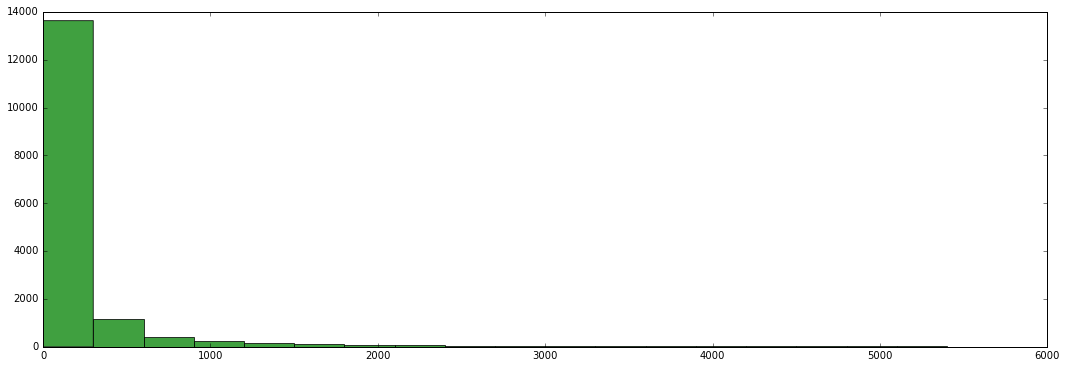

In [23]:
import matplotlib.mlab as mlab
mu, sigma = 100, 15
# the histogram of the data
n, bins, patches = plt.hist(sedTable.ep_SSC_mgl, 20, range=[0, 6000], normed=0, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

#plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
#plt.grid(True)

plt.show()

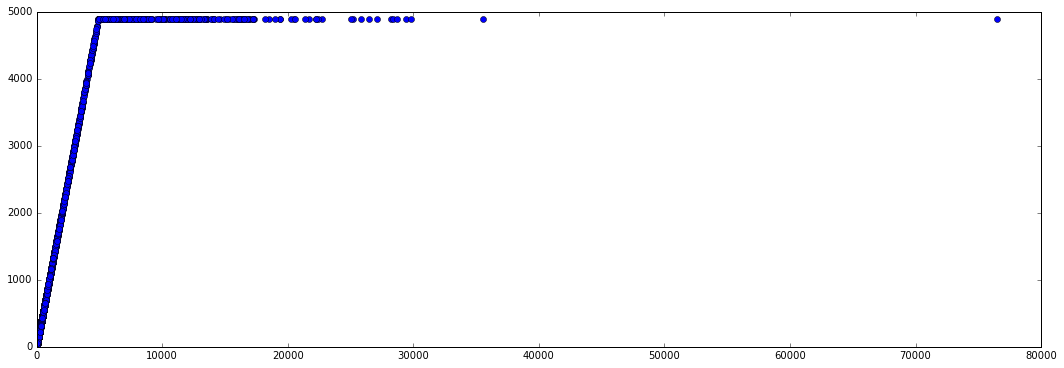

In [24]:
plt.plot(sedTable.ep_SSC_mgl,sedTable.ADJepSSCmg,'o')

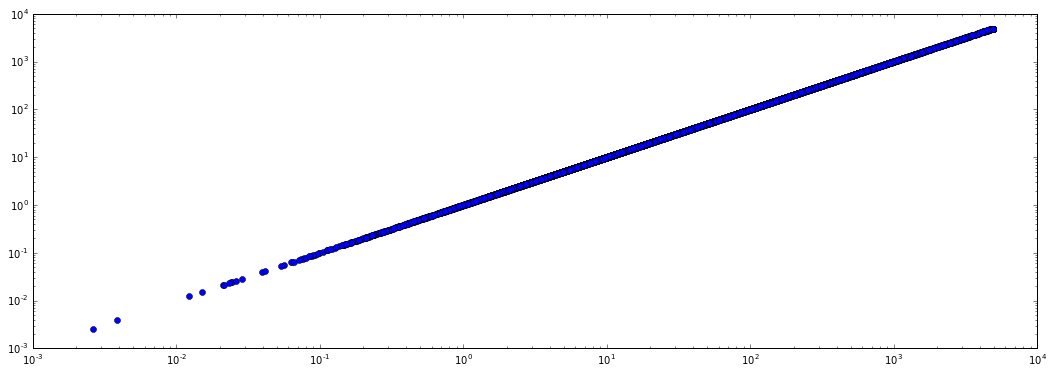

In [11]:
plt.loglog(sedTable.ADJepSSCmg,sedTable.ADJepSSCmg,'o')

In [25]:
# Calculate sed flux 

# calculate Sediment flux, lowering rate

# convert mg/l to kg/m3
# result is in KG/year

# SUM is Runoff in m3 year 
# 1000 mg/l = 1 kg/m^3


sedTable['EP_sedFlux_kgYr'] = (sedTable['ADJepSSCmg'] / 1000.0) * (sedTable['runoff_m3yr'])

# calculate volume removed 

# sed Flux in kg/yr 
# assume rock is 2600 kg/m3

# volume is  m3/year 
sedTable['EP_volRemoved_m3Yr'] = sedTable['EP_sedFlux_kgYr'] /2600.

# divide by m3/yr by the area in m2 to get m/year. Then divide by 0.001 to get mm/year 
sedTable['EP_loweringRate_mmYr'] = (sedTable['EP_volRemoved_m3Yr'] / sedTable['area_m2']) /0.001

In [30]:
sedTable['EP_sedFlux_kgYr'].sum()

889706617191.5684

In [31]:
sedTable.to_csv('SedTable_7_06_2016.csv')

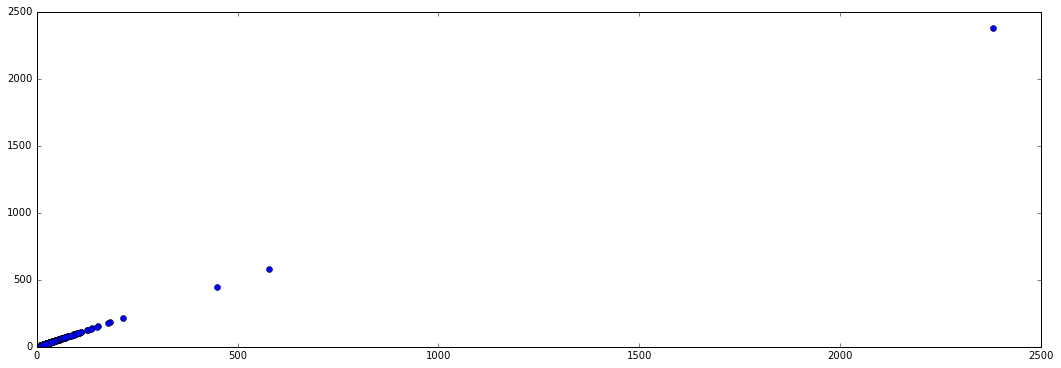

In [14]:
plt.plot(sedTable.EP_loweringRate_mmYr,sedTable.EP_loweringRate_mmYr,'o')

In [ ]:
# Additional Steps done in arcGIS
# merged it back onto hte original shapefile
# cleaned all values without a erosion rate (null or equal to zero)
# got rid of ~ 10 locations where erosin rate was physically unrealistic (99 mm/year)

In [27]:
# kilograms total sediment flux
tot_sed_flux_kg = 889706617191.5684

In [ ]:
# a gigaton is 10**9



In [32]:
10**9

1000000000

In [ ]:
#1 000 thoushand 
#1 000 000 million
#1 000 000 000 billion
#1 000 000 000 000 trillion 

In [28]:
# convert kg to tons
(tot_sed_flux_kg/1000)/ 10**9


0.8897066171915684

In [35]:
#8871 GT 

991120000000-
705136608000

285983392000

In [42]:
(8897066171915.717/1000)/10**9

8.897066171915716

In [29]:
# We are way to high in terms of sediment flux. (like should be .8 GT, not 8.8 GT)

# THE TOTAL amount of runoff is  too high... 
# Should be ~ 400 to 500 km3/year (according to Bamber et al. 2012)

sedTable['runoff_m3yr'].sum()


446691567572.39966

In [ ]:
# Jacobshavn runoff from OLD dataset (ALL_CATCH_Melt_Extent)

#10535900000

# FROM NEW its higher, and 10x. 
#144023000000
